<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>3. Model Development</strong></h2>
  <p style="color:#333333;">Model Selection and Preliminary Performance Testing</p>
</div>

The selection of TF-IDF + Logistic Regression, LSTM, and BERT for sentiment analysis of tweets is grounded in both established research and best practices in natural language processing. TF-IDF combined with Logistic Regression provides a strong and interpretable baseline, particularly effective for sparse and high-dimensional text data like tweets (Ramos, 2003; Wang & Manning, 2012). It has been widely used in sentiment analysis tasks due to its simplicity and effectiveness in capturing word importance without sequence modeling. LSTM (Long Short-Term Memory) networks, introduced by Hochreiter & Schmidhuber (1997), are well-suited for handling the sequential nature of text and capturing long-term dependencies, which enhances performance on informal and context-sensitive content such as tweets (Zhou et al., 2016). BERT (Bidirectional Encoder Representations from Transformers) by Devlin et al. (2019) represents the state-of-the-art in many NLP tasks, including sentiment analysis, due to its deep contextual understanding and bidirectional attention mechanism, making it particularly effective for nuanced sentiment interpretation in short texts. This multi-model evaluation approach allows us to compare performance across lexical, sequential, and contextual modeling strategies. Only after testing all three will we select the best-performing model based on predefined evaluation metrics, followed by full-scale training and final evaluation, as recommended in model selection best practices (Sammut & Webb, 2017; Zhang et al., 2021). This ensures robustness, fairness, and optimal utilization of resources.

**References:**

* Ramos, J. (2003). Using TF-IDF to determine word relevance in document queries.
* Wang, S., & Manning, C. D. (2012). Baselines and Bigrams: Simple, Good Sentiment and Topic Classification.
* Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. Neural Computation.
* Zhou, P., et al. (2016). Attention-Based Bidirectional LSTM Networks for Relation Classification.
* Devlin, J., et al. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding.
* Sammut, C., & Webb, G. I. (2017). Encyclopedia of Machine Learning and Data Mining.
* Zhang, Y., et al. (2021). A Comprehensive Review on Deep Learning for Text Classification.


## Model Development

Following thorough exploratory data analysis and data preprocessing, we now move into the model development phase. The objective is to evaluate different machine learning and deep learning architectures to classify tweet sentiment effectively using the Sentiment140 dataset.

Given the informal and brief nature of tweets, sentiment classification presents unique challenges: sparse context, slang, emojis, abbreviations, and inconsistent punctuation. To address these, we explore a spectrum of model complexities — from classical linear models to deep language models — to assess their performance, interpretability, and scalability.

The following models will be implemented and compared:

- **TF-IDF + Logistic Regression**: A classical baseline that leverages term frequency and inverse document frequency to convert text into numeric features before applying a simple, interpretable classifier.
- **Bidirectional LSTM**: A recurrent neural network capable of capturing long-term dependencies and understanding contextual flow in short, noisy texts.
- **DistilBERT**: A distilled transformer model pretrained on large corpora, providing state-of-the-art performance in many NLP tasks, including sentiment analysis.

Each model will be trained using the preprocessed dataset, and evaluated on the validation and test sets. Evaluation metrics include:

- **Accuracy**  
- **Precision, Recall, F1-Score**  
- **Confusion Matrix**  
- **Training time and resource cost**

This multi-model comparison aims to answer:

- Which model best captures sentiment from tweets?
- What are the trade-offs between speed, complexity, and accuracy?
- Which model generalizes best to unseen real-world tweet data?

The results will guide practical model selection for sentiment-sensitive applications in finance, customer experience monitoring, and public policy analysis.


In [ ]:
# importing all libraries here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import gdown
import os
from tensorflow.keras.callbacks import ReduceLROnPlateau
import zipfile
import requests
import io

In [ ]:
# Here, we begin by loading the processed dataset

# Step 1: Set the correct local path
zip_path = "train_dataset_comp.zip"

# Step 2: Extract only 'train_dataset.csv'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Check contents (optional debug)
    print("ZIP contents:", zip_ref.namelist())

    # Extract only train dataset
    zip_ref.extract("train_dataset.csv")

# Step 3: Load the extracted CSV
train_df = pd.read_csv("train_dataset.csv")
print(f"Loaded train_dataset.csv with shape: {train_df.shape}")


ZIP contents: ['train_dataset.csv']
Loaded train_dataset.csv with shape: (936194, 3)


In [ ]:
# We load the validation dataset

val_df = pd.read_csv("val_dataset.csv")

print(f"Loaded validation dataset with shape: {val_df.shape}")

Loaded validation dataset with shape: (200614, 3)


In [ ]:
# Drop any rows where 'text' or 'target' is null
train_df = train_df.dropna(subset=["text", "target"])
val_df = val_df.dropna(subset=["text", "target"])

# Replace 'MENTION' with 'mentionuser' in the 'text' column
train_df['text'] = train_df['text'].str.replace('MENTION', 'mentionuser', regex=False)
val_df['text'] = val_df['text'].str.replace('MENTION', 'mentionuser', regex=False)

# Keep only text and target columns
train_df=train_df[['text', 'target']]
val_df=val_df[['text', 'target']]

In [ ]:
train_df.head()

,text,target
0,mentionuser good u great band yes think daught...,4
1,work glummy wednesday,0
2,getting lost signpostfree road kildareoffaly w...,0
3,good morning everyone,4
4,kidding coursethough wish could part late nigh...,0


In [ ]:
val_df.head()

,text,target
0,mentionuser life lie,0
1,mentionuser airbender except stunning lack asi...,0
2,loving god fullest,4
3,kind sort awaketrying wake melissa go oral sur...,0
4,mentionuser bienvenue à montreal canada great ...,0


In [ ]:
# Now, we extract input and labels
X_train = train_df['text']
y_train = train_df['target']
X_val = val_df['text']
y_val = val_df['target']

# Final check
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape, "| y_val shape:", y_val.shape)

Train shape: (936194, 2)
Validation shape: (200614, 2)
X_train shape: (936194,) | y_train shape: (936194,)
X_val shape: (200614,) | y_val shape: (200614,)



<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.1 Baseline Model – TF-IDF + Logistic Regression</strong></h2>
  <p style="color:#333333;">TF-IDF vectorization + logistic regression as a benchmark.</p>
</div>


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ariesslin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ariesslin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ariesslin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization and stopword removal
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
# Load dataset from the preprocessed data
Tweets_copy_df = Tweets.copy()
Tweets_copy_df.head()

,text,target
0,text,target
1,mentionuser thats bummer shoulda got david car...,0
2,upset cant update facebook texting might cry r...,0
3,mentionuser dived many time ball managed save ...,0
4,whole body feel itchy like fire,0


In [ ]:


# Map sentiment labels (0=negative, 4=positive) to (0=negative, 1=positive)
#Tweets_copy_df['target'] = Tweets_copy_df['target'].map({0: 0, 4: 1})

# Preprocess text
Tweets_copy_df['clean_text'] = Tweets_copy_df['text'].apply(preprocess_text)

In [ ]:
# Split data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    Tweets_copy_df['clean_text'], Tweets_copy_df['target'], test_size=0.2, random_state=42
)
print("X_train shape:", X_train_1.shape, "| y_train shape:", y_train_1.shape)
print("X_test shape:", X_test_1.shape, "| y_test shape:", y_test_1.shape)

X_train shape: (1279596,) | y_train shape: (1279596,)
X_test shape: (319900,) | y_test shape: (319900,)


In [ ]:
# Create pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=10000,
        ngram_range=(1, 2) )
    ),
    ('clf', LogisticRegression(
        max_iter=1000,
        random_state=42,
        class_weight='balanced')
    )
])

In [ ]:
y_train_1.head()

174335     0
306270     0
1518505    4
1258400    4
508917     0
Name: target, dtype: object

In [ ]:
print("Missing values in y_train:", y_train_1.isna().sum())
print("Unique values before conversion:", y_train_1.unique())
print("Missing values in y_train:", y_test_1.isna().sum())
print("Unique values before conversion:", y_test_1.unique())

Missing values in y_train: 0
Unique values before conversion: ['0' 0 4 'target']
Missing values in y_train: 0
Unique values before conversion: [4 0 '0']


In [ ]:
y_train_1 = y_train_1.apply(lambda x: 0 if x=='target' else x)

In [ ]:
print("Unique values before conversion:", y_train_1.unique())

Unique values before conversion: ['0' 0 4]


In [ ]:
# Ensure your target variable is properly formatted
y_train_1 = pd.to_numeric(y_train_1, errors='coerce').astype(int)
y_test_1 = pd.to_numeric(y_test_1, errors='coerce').astype(int)

# Verify the conversion
print("Unique values in y_train:", np.unique(y_train_1))
print("Data type:", y_train_1.dtype)
print("Unique values in y_train:", np.unique(y_test_1))
print("Data type:", y_test_1.dtype)

# Train model
pipeline.fit(X_train_1, y_train_1)

Unique values in y_train: [0 4]
Data type: int64
Unique values in y_train: [0 4]
Data type: int64


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [ ]:
# Evaluate
y_pred_1 = pipeline.predict(X_test_1)
print("Accuracy:", accuracy_score(y_test_1, y_pred_1))
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred_1))

# Example prediction
test_tweet = "I love this product! It's amazing."
clean_test = preprocess_text(test_tweet)
print("\nTest Tweet Prediction:", pipeline.predict([clean_test])[0])

Accuracy: 0.7844076273835574

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159404
           4       0.77      0.81      0.79    160496

    accuracy                           0.78    319900
   macro avg       0.78      0.78      0.78    319900
weighted avg       0.78      0.78      0.78    319900


Test Tweet Prediction: 4


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

def tune_hyperparameters(X_train, y_train):
    """
    Perform hyperparameter tuning for TF-IDF + Logistic Regression pipeline

    Args:
        X_train: Training text data
        y_train: Training labels

    Returns:
        Best estimator and best parameters found
    """
    # Define the pipeline
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Define parameter grid
    param_grid = {
        'tfidf__max_features': [5000, 10000, 20000],
        'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or unigrams+bigrams
        'tfidf__min_df': [1, 5],  # minimum document frequency
        'tfidf__max_df': [0.7, 0.9],  # maximum document frequency (ignore too common words)
        'clf__C': [0.1, 1, 10],  # inverse of regularization strength
        'clf__penalty': ['l1', 'l2'],  # regularization type
        'clf__class_weight': [None, 'balanced']
    }

    # Set up GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=3,  # 3-fold cross-validation
        scoring='f1_weighted',  # can change to 'accuracy' or other metrics
        n_jobs=-1,  # use all available CPU cores
        verbose=1
    )

    # Perform the grid search
    print("Starting grid search...")
    grid_search.fit(X_train, y_train)

    # Print results
    print("\nBest parameters found:")
    print(grid_search.best_params_)

    print("\nBest cross-validation score: {:.2f}".format(grid_search.best_score_))

    return grid_search.best_estimator_, grid_search.best_params_


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import os
import joblib

def tune_hyperparameters_with_cache(X_train, y_train, cache_dir='./cache'):
    """
    Perform hyperparameter tuning with memory caching

    Args:
        X_train: Training text data
        y_train: Training labels
        cache_dir: Directory to store cached computations

    Returns:
        Best estimator and best parameters found
    """
    # Create cache directory if it doesn't exist
    os.makedirs(cache_dir, exist_ok=True)

    # Clear previous cache to ensure fresh start
    joblib.Memory(location=cache_dir, verbose=0).clear()

    # Define the pipeline with memory caching
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression(max_iter=1000, random_state=42))
    ], memory=joblib.Memory(location=cache_dir, verbose=0))

    # Define parameter grid (same as before)
    param_grid = {
        'tfidf__max_features': [5000, 10000, 20000],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'tfidf__min_df': [1, 5],
        'tfidf__max_df': [0.7, 0.9],
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l1', 'l2'],
        'clf__class_weight': [None, 'balanced']
    }

    # Set up GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=3,
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=1
    )

    # Perform the grid search
    print(f"Starting grid search with caching at {cache_dir}...")
    grid_search.fit(X_train, y_train)

    # Print results
    print("\nBest parameters found:")
    print(grid_search.best_params_)
    print("\nBest cross-validation score: {:.2f}".format(grid_search.best_score_))

    return grid_search.best_estimator_, grid_search.best_params_

In [ ]:
# Tune hyperparameters and test the best_model to predict a sample text:
best_model, best_params = tune_hyperparameters(X_train, y_train)
#best_model, best_params = tune_hyperparameters_with_cache(X_train, y_train, cache_dir='./tfidf_cache')
#cache inspection
#cache = joblib.Memory(location='./cache')
#print(cache.reduce_size())

Starting grid search...
Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [ ]:
#clean cache
#import shutil
#shutil.rmtree('./cache')  # Complete cleanup

In [ ]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.2 LSTM Model</strong></h2>
  <p style="color:#333333;">Bidirectional LSTM with pre-trained embeddings (e.g., Wrod2Vec).</p>
</div>

In [ ]:
# Step 1: Reinstall compatible keras
#!pip uninstall -y keras
#!pip install -q keras==3.8.0

### Use !pip install -r "../requirements.txt" at the beginning of the notebook instead

GPU was turned off here due to compatibility issue of the environment with CuDNN

In [ ]:
import tensorflow as tf

# Hide all GPUs at runtime (must be done before anything else in TensorFlow)
tf.config.set_visible_devices([], 'GPU')

print("After disabling:", tf.config.get_visible_devices())


2025-06-24 11:38:27.152179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750779507.173642  454570 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750779507.180128  454570 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750779507.196774  454570 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750779507.196787  454570 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750779507.196789  454570 computation_placer.cc:177] computation placer alr

After disabling: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [ ]:
# loading all libraries here
import numpy as np
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from transformers import EarlyStoppingCallback, TrainingArguments, Trainer
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# we tokenize each tweet for training and testing data

training_df = train_df[['text','target']].copy()
val_df = val_df[['text','target']].copy()

# Apply gensim's tokenizer
tokenized_train = training_df['text'].dropna().astype(str).apply(simple_preprocess).tolist()
tokenized_val = val_df['text'].dropna().astype(str).apply(simple_preprocess).tolist()

In [ ]:
# first train our Word2Vec on the Tokenized Data

embedding_dim = 100

model_LSTM = Word2Vec(
    sentences=tokenized_train,
    vector_size=embedding_dim,
    window=10,
    min_count=2,
    sg=1,  # Skip-gram
    seed=42,
    workers=10
)

word2vec_model = model_LSTM.wv  # Use KeyedVectors for embedding lookup

In [ ]:
# Prepare for Keras Tokenizer

# Join tokens back into space-separated strings
#tokenized_train_texts = [' '.join(tokens) for tokens in tokenized_train]
#tokenized_val_texts = [' '.join(tokens) for tokens in tokenized_val]

# Fit tokenizer on training texts
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(tokenized_train_texts)

#word_index = tokenizer.word_index

In [ ]:
# Next, we Build the Embedding Matrix

#embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
#found = 0

#for word, i in word_index.items():
 #   if word in word2vec_model:
  #      embedding_matrix[i] = word2vec_model[word]
   #     found += 1

#print(f"Words matched: {found}/{len(word_index)}")

#### quick debugging insights

That means ~74% of tokens in a tweet have no embeddings, the model is learning from almost nothing.

Why?
Because those tokens likely correspond to words not found in Word2Vec vocabulary. This means our embedding matrix isn't covering the actual tokens used in training.

This will cause some major issues as we train the model, in fact by several experiments, the model never actually really learned, i could not even make it overfit.
This means that likely our Word2Vec trained on clean tokens but Tokenizer worked on noisy ones (e.g., lollll, omggg)


In [ ]:
# for now, i will only limit tokenisation on trained words

# Prepare for Keras Tokenizer

# Join tokens back into space-separated strings
tokenized_train_texts = [' '.join(tokens) for tokens in tokenized_train]
tokenized_val_texts = [' '.join(tokens) for tokens in tokenized_val]

# Fit tokenizer on training texts
tokenizer = Tokenizer(num_words=82014)
tokenizer.fit_on_texts(tokenized_train_texts)

word_index = tokenizer.word_index

In [ ]:
# Next, we Build the Embedding Matrix

embedding_matrix = np.zeros((tokenizer.num_words, embedding_dim))

found = 0
for word, i in tokenizer.word_index.items():
    if i >= tokenizer.num_words:
        continue
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]
        found += 1
print(f"Words matched: {found}/{tokenizer.num_words}")


Words matched: 82013/82014


In [ ]:
# Next, Convert Texts to Sequences and Pad

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(tokenized_train_texts)
X_val_seq = tokenizer.texts_to_sequences(tokenized_val_texts)

# Define max sequence length
max_len = max(len(seq) for seq in X_train_seq)

# Pad sequences to same length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')


In [ ]:
# We convert the target to float, and encode 0 and 1 to accommodate for sigmoid:

y_train = np.where(y_train == 4, 1.0, 0.0).astype(np.float32)
y_val = np.where(y_val == 4, 1.0, 0.0).astype(np.float32)


In [ ]:
# First, we reduce our model to a small Sanity Test

# Use a very small subset to test if model can overfit
X_small = X_train_pad[:100]
y_small = y_train[:100]

# Sanity check: Create a simple model
model = Sequential()
model.add(Embedding(
    input_dim=embedding_matrix.shape[0],
    output_dim=embedding_matrix.shape[1],
    weights=[embedding_matrix],
    input_length=X_small.shape[1],
    trainable=True
))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Fit to a small subset to test if it can overfit
history = model.fit(X_small, y_small, epochs=20, batch_size=10, verbose=2)

Epoch 1/20


/courses/IE7500.202550/shared/conda_env_1/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1750779739.411284  454754 service.cc:152] XLA service 0x14cfcc00d080 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750779739.411318  454754 service.cc:160]   StreamExecutor device (0): Host, Default Version
2025-06-24 11:42:19.477099: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750779740.570889  454754 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 - 4s - 387ms/step - accuracy: 0.5700 - loss: 0.6789
Epoch 2/20
10/10 - 0s - 33ms/step - accuracy: 0.6000 - loss: 0.6373
Epoch 3/20
10/10 - 0s - 34ms/step - accuracy: 0.7100 - loss: 0.5797
Epoch 4/20
10/10 - 0s - 33ms/step - accuracy: 0.8100 - loss: 0.4574
Epoch 5/20
10/10 - 0s - 34ms/step - accuracy: 0.8600 - loss: 0.3456
Epoch 6/20
10/10 - 0s - 33ms/step - accuracy: 0.9200 - loss: 0.2271
Epoch 7/20
10/10 - 0s - 33ms/step - accuracy: 0.9600 - loss: 0.1301
Epoch 8/20
10/10 - 0s - 33ms/step - accuracy: 0.9800 - loss: 0.0700
Epoch 9/20
10/10 - 0s - 33ms/step - accuracy: 0.9900 - loss: 0.0453
Epoch 10/20
10/10 - 0s - 33ms/step - accuracy: 0.9900 - loss: 0.0352
Epoch 11/20
10/10 - 0s - 33ms/step - accuracy: 0.9700 - loss: 0.0691
Epoch 12/20
10/10 - 0s - 34ms/step - accuracy: 0.8900 - loss: 0.2512
Epoch 13/20
10/10 - 0s - 33ms/step - accuracy: 0.9800 - loss: 0.1243
Epoch 14/20
10/10 - 0s - 33ms/step - accuracy: 0.9600 - loss: 0.1575
Epoch 15/20
10/10 - 0s - 33ms/step - accuracy: 0.9700

In [ ]:
# Now, we build our model

# Define model
LSTMmodel = Sequential()

# 1. Embedding layer
LSTMmodel.add(Embedding(
    input_dim=embedding_matrix.shape[0],
    output_dim=embedding_matrix.shape[1],
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False
))

# 2. First LSTM
LSTMmodel.add(Bidirectional(LSTM(265, return_sequences=True)))

LSTMmodel.add(Dropout(0.5))

# 3. Second LSTM
LSTMmodel.add(Bidirectional(LSTM(128)))

# 4. Dropout
LSTMmodel.add(Dropout(0.3))

# 5. Output
LSTMmodel.add(Dense(1, activation='sigmoid'))

# Compile
optimizer = Nadam(learning_rate=0.001)
LSTMmodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show summary
LSTMmodel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     8,201,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,201,400 (31.29 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 8,201,400 (31.29 MB)

Epoch 1/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1145s 608ms/step - accuracy: 0.7725 - loss: 0.4731 - val_accuracy: 0.7906 - val_loss: 0.4512
Epoch 2/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1139s 608ms/step - accuracy: 0.7983 - loss: 0.4330 - val_accuracy: 0.8018 - val_loss: 0.4264
Epoch 3/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1137s 607ms/step - accuracy: 0.8052 - loss: 0.4213 - val_accuracy: 0.8051 - val_loss: 0.4211
Epoch 4/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1137s 607ms/step - accuracy: 0.8104 - loss: 0.4127 - val_accuracy: 0.8070 - val_loss: 0.4157
Epoch 5/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1137s 607ms/step - accuracy: 0.8145 - loss: 0.4052 - val_accuracy: 0.8057 - val_loss: 0.4201
Epoch 6/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1137s 607ms/step - accuracy: 0.8180 - loss: 0.3990 - val_accuracy: 0.8105 - val_loss: 0.4105
Epoch 7/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1137s 607ms/step - accuracy: 0.8215 - loss: 0.3914 - val_accuracy: 0.8119 - val_loss: 0.4096
Epoch 8/20
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 1137s 607ms/s

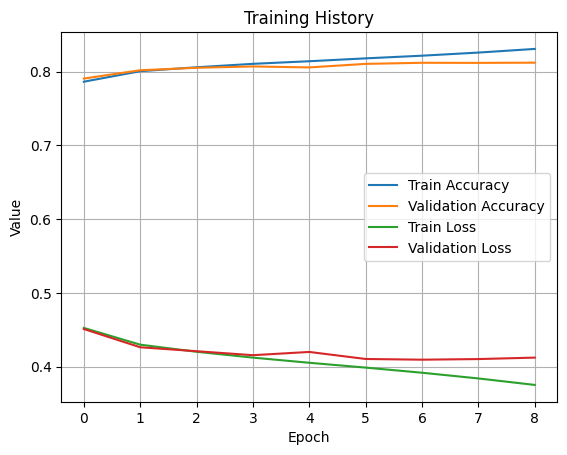

6270/6270 ━━━━━━━━━━━━━━━━━━━━ 347s 55ms/step


/courses/IE7500.202550/shared/conda_env_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Validation Performance (LSTM) ---
Accuracy:  0.4020
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000


NameError: name 'ConfusionMatrixDisplay' is not defined

In [ ]:
# Next we train our model, and then visualize performance

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = LSTMmodel.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=20,
    batch_size=500,
    callbacks=[early_stop]
)

# Save the model and download
LSTMmodel.save("sentiment_lstm_model.keras")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()


# Predict class labels from probabilities
y_val_pred_probs = LSTMmodel.predict(X_val_pad)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Compute metrics
acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred)
rec = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print results
print("\n--- Validation Performance (LSTM) ---")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay(cm, display_labels=["Negative", "Positive"]).plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.grid(False)
plt.show()

______________________________________________________________________________________________________________________________


--- Validation Performance (LSTM) ---
Accuracy:  0.4020
Precision: 0.0000
Recall:    0.0000
F1 Score:  0.0000


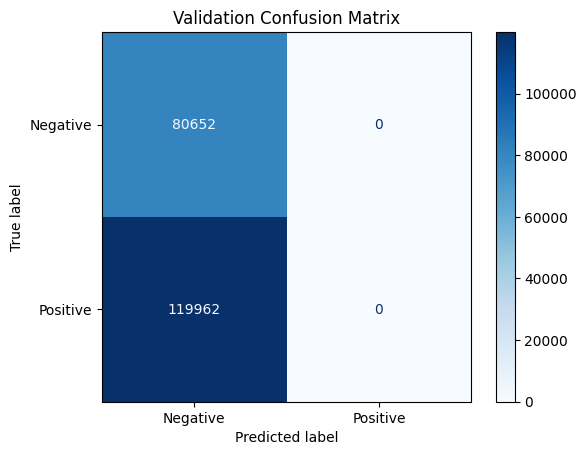

In [ ]:
# Compute metrics with zero_division handling
acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred, zero_division=0)
rec = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)

# Print results
print("\n--- Validation Performance (LSTM) ---")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"]).plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.grid(False)
plt.show()


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.3 BERT Model</strong></h2>
  <p style="color:#333333;">Fine-tuning DistilBERT or similar transformer model (if feasible).</p>
</div>


In [ ]:
# Install Hugging Face Transformers
!pip install transformers datasets -q

In [ ]:
!pip install --upgrade transformers

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install -U accelerate

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install -U transformers accelerate

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import os
os._exit(0)

In [ ]:
import sys
sys.path.insert(0, "/home/albahri.m/.local/lib/python3.12/site-packages")

In [ ]:
# Importing all libraries here

import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc )
from datasets import Dataset
from transformers import EarlyStoppingCallback
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [ ]:
# We fix the data type

# Ensure 'target' is int and remap 4 → 1
train_df['labels'] = train_df['target'].astype(int).replace({4: 1})
val_df['labels'] = val_df['target'].astype(int).replace({4: 1})

# Ensure text is string
train_df['text'] = train_df['text'].astype(str)
val_df['text'] = val_df['text'].astype(str)

In [ ]:
# Next, we convert to Hugging Face Datasets format

train_dataset = Dataset.from_pandas(train_df[['text', 'labels']])
val_dataset = Dataset.from_pandas(val_df[['text', 'labels']])

In [ ]:
# Next, we perform tokenization with DistilBERT

# Load pretrained tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenize datasets
def tokenize_function(tokens):
    return tokenizer(tokens["text"], truncation=True, padding="max_length", max_length=140) # this number is intentional because we already showed tweets max length

train_tokenized = train_dataset.map(tokenize_function, batched=True)
val_tokenized = val_dataset.map(tokenize_function, batched=True)

Map: 100%|██████████| 200614/200614 [00:12<00:00, 16153.99 examples/s]


In [ ]:
# Next, we load DistilBERT with classification head
BERTmodel = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# After that, we define evaluation metrics

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

In [ ]:
# Next, we define training configuration

training_args = TrainingArguments(
    output_dir="./distilbert_fast_dev",   # Model output directory
    do_train=True,
    do_eval=False,                        # Skip evaluation for speed
    per_device_train_batch_size=32,       # Speed up with larger batch size
    num_train_epochs=2,
    learning_rate=1e-4,                   # Increased LR for faster convergence
    weight_decay=0.01,
    logging_steps=5000,                   # Less logging = less overhead
    save_steps=1_000_000,                 # Effectively disables mid-training saves
    save_total_limit=1,
    report_to=[]                          # Disable logging integrations
)

# Setup Trainer
BERTtrainer = Trainer(
    model=BERTmodel,
    args=training_args,
    train_dataset=train_tokenized,        # You can use a subset to test faster
    tokenizer=tokenizer
)

/tmp/ipykernel_1349124/403454765.py:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  BERTtrainer = Trainer(


Step,Training Loss
5000,0.455700
10000,0.455600
15000,0.454200
20000,0.444500
25000,0.444600
30000,0.434700
35000,0.414200
40000,0.406400
45000,0.400600
50000,0.396500



--- Validation Performance ---
Accuracy:  0.8149
Precision: 0.8318
Recall:    0.8654
F1 Score:  0.8483


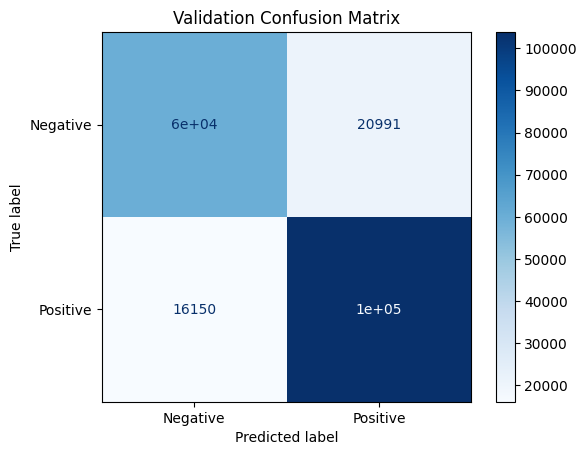

Final model weights saved to: final_distilbert_sentiment_model.pt


In [ ]:
# Now, we train our model

# 1. Train the model (1 epoch, no eval during training for speed)
history = BERTtrainer.train()

# 2. Evaluate on validation set
predictions = BERTtrainer.predict(val_tokenized)
y_true = predictions.label_ids
y_logits = predictions.predictions
y_pred = np.argmax(y_logits, axis=1)
y_probs = y_logits[:, 1]  # For ROC curve

# 3. Print validation metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n--- Validation Performance ---")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 4. Confusion Matrix (only plot retained for speed)
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Negative", "Positive"]).plot(cmap="Blues")
plt.title("Validation Confusion Matrix")
plt.grid(False)
plt.show()

# 5. Save final model weights only
final_model_path = "final_distilbert_sentiment_model.pt"
torch.save(BERTmodel.state_dict(), final_model_path)
print(f"Final model weights saved to: {final_model_path}")



<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.4 Model Comparison and Selection </strong></h2>
  <p style="color:#333333;">Evaluate using accuracy, precision, recall, F1-score, confusion matrix, and ROC curve.</p>
</div>


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.5 Final Model Training </strong></h2>
  <p style="color:#333333;">Evaluate using accuracy, precision, recall, F1-score, confusion matrix, and ROC curve.</p>
</div>


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>5. Model Evaluation </strong></h2>
  <p style="color:#333333;">Evaluate using accuracy, precision, recall, F1-score, confusion matrix, and ROC curve.</p>
</div>



<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>6. Conclusion</strong></h2>
  <p style="color:#333333;">Summarize findings and insights, discuss trade-offs, and generalization potential.</p>
</div>



<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>9. Future Work</strong></h2>
  <p style="color:#333333;">Suggest future extensions like streaming integration or domain adaptation.</p>
</div>
